In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Reccomendation_System_Dicoding

/content/drive/MyDrive/Reccomendation_System_Dicoding


# Instalasi dan Import Library

In [ ]:
!pip install Sastrawi

**Insight :** Menginstal library Sastrawi untuk kebutuhan preprocessing teks bahasa Indonesia (stopword removal dan stemming).


In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics.pairwise import cosine_similarity

from zipfile import ZipFile
from pathlib import Path

import tensorflow as tf # Make sure tensorflow is imported as tf
from tensorflow import keras
from tensorflow.keras import layers

**Insight :** Library di atas meliputi:

- Visualisasi (matplotlib, seaborn, plotly

- Preprocessing Teks (Sastrawi, TfidfVectorizer)

- Rekomendasi berbasis konten (cosine_similarity)

- Model rekomendasi neural network (TensorFlow)




In [ ]:
# Inisialisasi TF-IDF, Stemmer, dan Stopword Remover
tfidf_vectorizer_model = TfidfVectorizer(max_features=5000) # Renamed the variable
stem = StemmerFactory().create_stemmer()
stopword = StopWordRemoverFactory().create_stop_word_remover()

**Insight :**
- TF-IDF digunakan untuk mengubah teks (kategori wisata) menjadi fitur numerik.

- Stemmer dan stopword remover untuk preprocessing teks (jika digunakan).





## Load Dataset

In [ ]:
df_rating = pd.read_csv('/content/drive/MyDrive/Reccomendation_System_Dicoding/tourism_rating.csv')
df_place = pd.read_csv('/content/drive/MyDrive/Reccomendation_System_Dicoding/tourism_with_id.csv')
df_user = pd.read_csv('/content/drive/MyDrive/Reccomendation_System_Dicoding/user.csv')

**Insight :** Tiga sumber dataset

- df_rating: Data rating dari user

- df_place: Data tempat wisata

- df_user: Data pengguna

# Eksplorasi Awal Dataset

In [ ]:
# Cek informasi dasar tiap dataset
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
df_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [ ]:
# Tampilkan beberapa data teratas
df_place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
df_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
df_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


# Pembersihan dan Filter Data

In [ ]:
# Drop kolom yang tidak relevan
df_place = df_place.drop(['Time_Minutes','Unnamed: 11','Unnamed: 12'], axis=1)

In [ ]:
# Filter hanya tempat wisata di Kota Bandung
df_place = df_place[df_place['City'] == 'Bandung']

In [ ]:
df_place.head(1)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781


In [ ]:
# Filter data rating hanya untuk tempat wisata di Bandung
df_rating = pd.merge(df_rating, df_place[['Place_Id']], how='right', on='Place_Id')

In [ ]:
df_rating.head(1)

,User_Id,Place_Id,Place_Ratings
0,9,211,3


In [ ]:
# Filter user yang pernah memberi rating di Bandung
df_user = pd.merge(df_user, df_rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')


In [ ]:
df_user.head(1)

,User_Id,Location,Age
260,1,"Semarang, Jawa Tengah",20


# Visualisasi Data

## Tempat Wisata dengan Rating Terbanyak

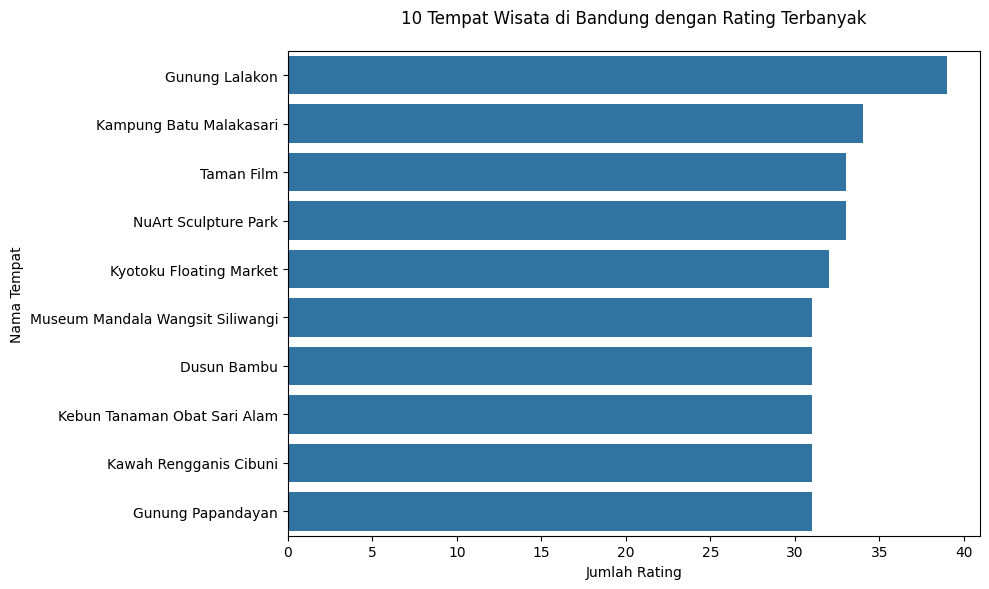

In [ ]:
# Buat dataframe tempat wisata dengan rating terbanyak
top_10 = df_rating['Place_Id'].value_counts().reset_index(name='rating_count').rename(columns={'index': 'Place_Id'})[0:10]

# Gabungkan dengan nama tempat
top_10 = pd.merge(top_10, df_place[['Place_Id','Place_Name']], how='left', on='Place_Id')

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x='rating_count', y='Place_Name', data=top_10)
plt.title('10 Tempat Wisata di Bandung dengan Rating Terbanyak', pad=20)
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Tempat')
plt.tight_layout()
plt.show()


**Insight:**
Menampilkan 10 tempat wisata paling populer berdasarkan jumlah rating dari user.



## Perbandingan Kategori Tempat Wisata

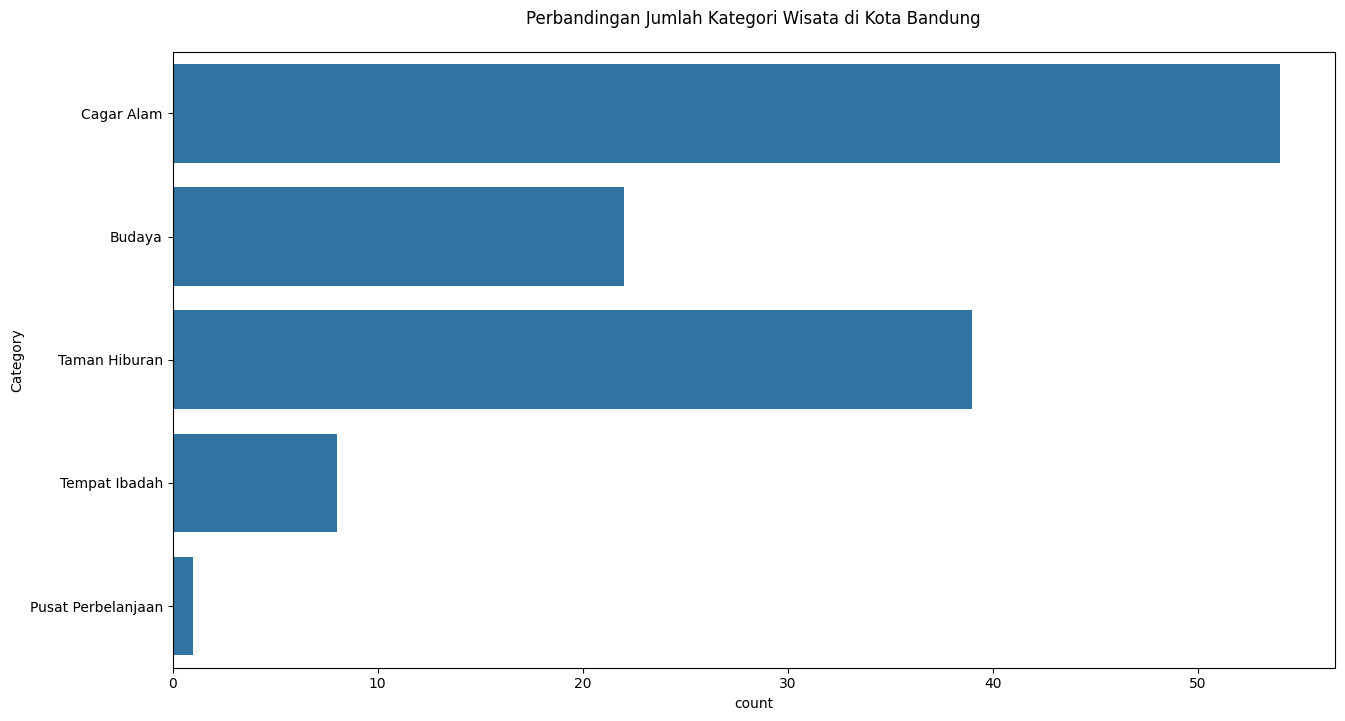

In [ ]:
sns.countplot(y='Category', data=df_place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()


**Insight :** Menunjukkan persebaran jenis kategori wisata (kuliner, alam, hiburan, dll).

##  Distribusi Usia Pengguna

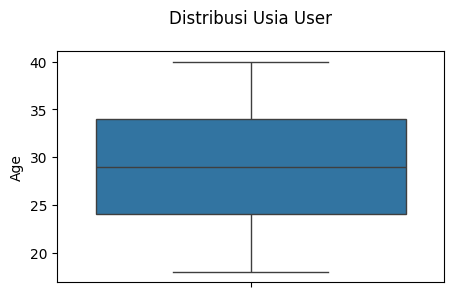

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(df_user['Age'])
plt.title('Distribusi Usia User', pad=20)
plt.show()


**Insight:** Analisis demografi user: usia & asal kota.

## Asal Kota User

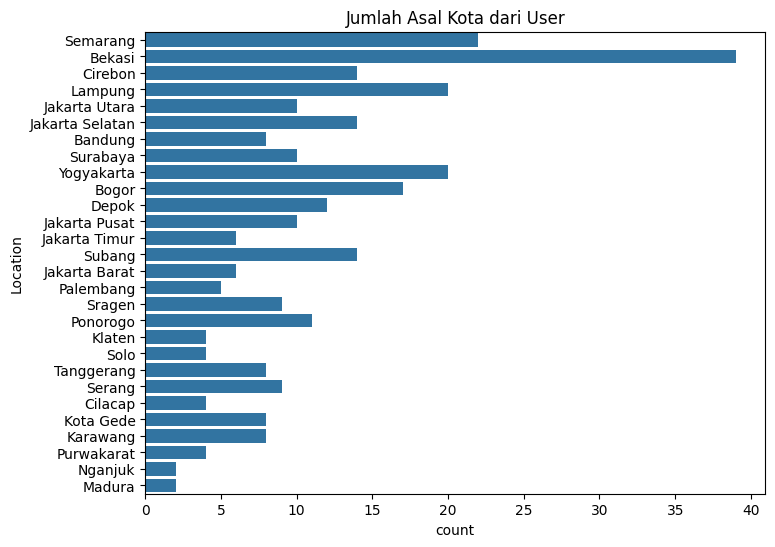

In [ ]:
asal_kota = df_user['Location'].apply(lambda x: x.split(',')[0])

plt.figure(figsize=(8,6))
sns.countplot(y=asal_kota)
plt.title('Jumlah Asal Kota dari User')
plt.show()


**Insght:** Berguna untuk personalisasi rekomendasi berdasarkan asal atau usia.

## Informasi Umum Tempat Wisata

In [ ]:
print(f"Terdapat {df_place['Place_Name'].nunique()} Tempat Wisata di Kota Bandung")
print(f"Terdiri dari {df_place['Category'].nunique()} Kategori Wisata yaitu")
print('Kategori Wisata  :', df_place['Category'].unique())


Terdapat 124 Tempat Wisata di Kota Bandung
Terdiri dari 5 Kategori Wisata yaitu
Kategori Wisata  : ['Cagar Alam' 'Budaya' 'Taman Hiburan' 'Tempat Ibadah'
 'Pusat Perbelanjaan']


## Pie Chart Kategori Tempat Wisata

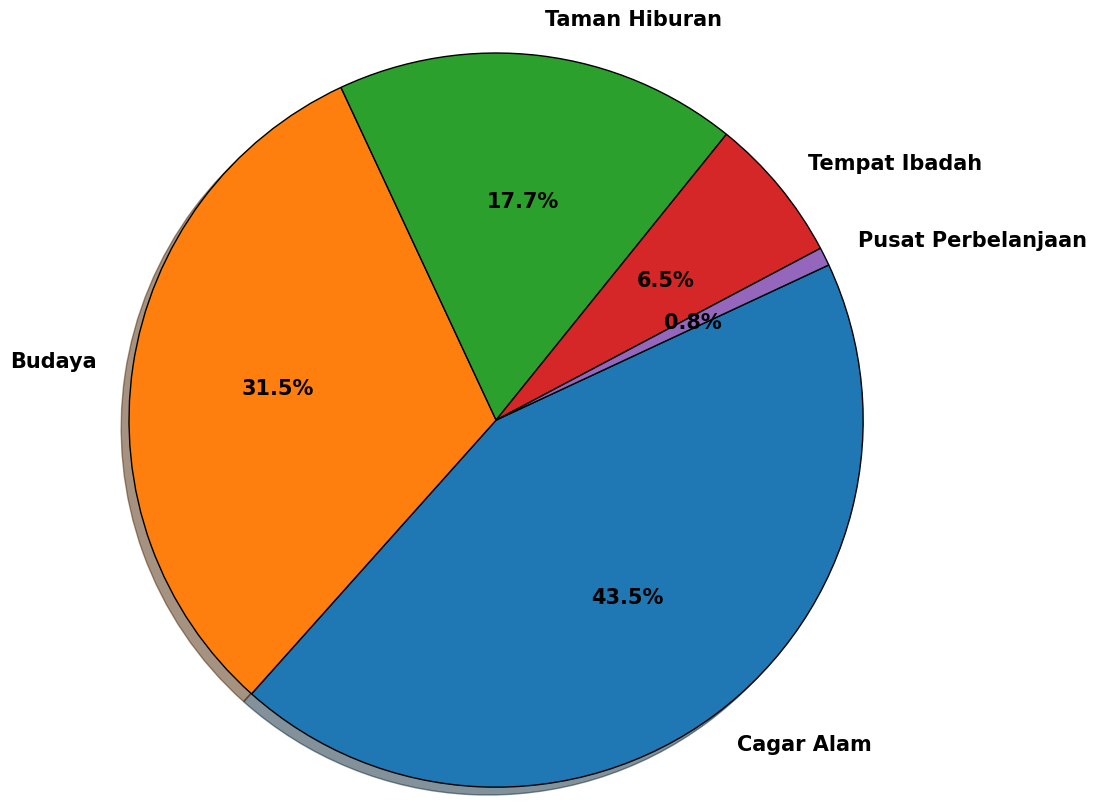

Jumlah Tempat Wisata dengan Kategori Cagar Alam : 54
Jumlah Tempat Wisata dengan Kategori Taman Hiburan : 39
Jumlah Tempat Wisata dengan Kategori Budaya : 22
Jumlah Tempat Wisata dengan Kategori Tempat Ibadah : 8
Jumlah Tempat Wisata dengan Kategori Pusat Perbelanjaan : 1


In [ ]:
columns_category_type = df_place['Category'].unique().tolist()
plt.rcParams["figure.figsize"] = (15,8)
plt.pie(df_place['Category'].value_counts(), autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=True, startangle=25,
        radius=1.3, labels=columns_category_type, textprops={'fontsize': 15, 'weight': 'bold'})
plt.tight_layout()
plt.show()

for label, count in df_place['Category'].value_counts().items():
    print("Jumlah Tempat Wisata dengan Kategori", label, ":", count)


## Jumlah User Berdasarkan Kota

In [ ]:
for label, count in df_user['Location'].value_counts().items():
    print("Jumlah User dari Kota", label, ":", count)


Jumlah User dari Kota Bekasi, Jawa Barat : 39
Jumlah User dari Kota Semarang, Jawa Tengah : 22
Jumlah User dari Kota Lampung, Sumatera Selatan : 20
Jumlah User dari Kota Yogyakarta, DIY : 20
Jumlah User dari Kota Bogor, Jawa Barat : 17
Jumlah User dari Kota Cirebon, Jawa Barat : 14
Jumlah User dari Kota Jakarta Selatan, DKI Jakarta : 14
Jumlah User dari Kota Subang, Jawa Barat : 14
Jumlah User dari Kota Depok, Jawa Barat : 12
Jumlah User dari Kota Ponorogo, Jawa Timur : 11
Jumlah User dari Kota Jakarta Utara, DKI Jakarta : 10
Jumlah User dari Kota Surabaya, Jawa Timur : 10
Jumlah User dari Kota Jakarta Pusat, DKI Jakarta : 10
Jumlah User dari Kota Sragen, Jawa Tengah : 9
Jumlah User dari Kota Serang, Banten : 9
Jumlah User dari Kota Bandung, Jawa Barat : 8
Jumlah User dari Kota Karawang, Jawa Barat : 8
Jumlah User dari Kota Kota Gede, DIY : 8
Jumlah User dari Kota Tanggerang, Banten : 8
Jumlah User dari Kota Jakarta Timur, DKI Jakarta : 6
Jumlah User dari Kota Jakarta Barat, DKI Jakart

## Model Content Based Filtering

In [ ]:
# Model Content Based Filtering
tfidf_vectorizer_for_category = TfidfVectorizer() # Renamed the variable again for clarity in this section
tfidf_vectorizer_for_category.fit(df_place['Category'])
tfidf_vectorizer_for_category.get_feature_names_out()

array(['alam', 'budaya', 'cagar', 'hiburan', 'ibadah', 'perbelanjaan',
       'pusat', 'taman', 'tempat'], dtype=object)

**Insight** : Membuat sistem rekomendasi berbasis konten dengan kemiripan kategori wisata.

In [ ]:
tfidf_matrix = tfidf_vectorizer_for_category.fit_transform(df_place['Category'])
tfidf_matrix.shape

(124, 9)

In [ ]:
tfidf_matrix.todense()

matrix([[0.70710678, 0.        , 0.70710678, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.70710678, 0.        , 0.70710678, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_vectorizer_for_category.get_feature_names_out(),
    index=df_place.Place_Name
).sample(10, axis=0)


,alam,budaya,cagar,hiburan,ibadah,perbelanjaan,pusat,taman,tempat
Place_Name,,,,,,,,,
The Great Asia Africa,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0,0.707107,0.000000
Lereng Anteng Panoramic Coffee Place,0.707107,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Bandros City Tour,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Wisata Batu Kuda,0.707107,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Bukit Moko,0.707107,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Museum Mandala Wangsit Siliwangi,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Tektona Waterpark,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0,0.707107,0.000000
Gereja Tiberias Indonesia Bandung,0.000000,0.0,0.000000,0.000000,0.707107,0.0,0.0,0.000000,0.707107
Kampoeng Tulip,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0,0.707107,0.000000


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [ ]:
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=df_place.Place_Name, columns=df_place.Place_Name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)

Shape: (124, 124)


Place_Name,GunungTangkuban perahu,Jalan Braga,Gedung Sate,Trans Studio Bandung,Taman Hutan Raya Ir. H. Djuanda,Farm House Susu Lembang,Kebun Binatang Bandung,Kawah Putih,Tebing Karaton,Dusun Bambu,...,Saung Angklung Mang Udjo,Taman Kupu-Kupu Cihanjuang,Taman Miniatur Kereta Api,Gua Pawon,Bukit Gantole Cililin,Bandros City Tour,Kyotoku Floating Market,Rainbow Garden,Kota Mini,Chingu Cafe Little Seoul
Place_Name,,,,,,,,,,,,,,,,,,,,,
Curug Cimahi,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Jendela Alam,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Masjid Pusdai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Museum Pos Indonesia,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Happyfarm Ciwidey,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Gua Pawon,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Taman Budaya Jawa Barat,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Rainbow Garden,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Kiara Artha Park,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
def destination_recommendations(place_name, similarity_data=cosine_sim_df, items=df_place[['Place_Name', 'Category']], k=10):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

**Insight :**  Menyediakan rekomendasi wisata berdasarkan tempat yang mirip (dari sisi kategori).

In [ ]:
place_name = 'Trans Studio Bandung'
df_place[df_place.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
213,214,Trans Studio Bandung,Trans Studio Bandung adalah kawasan wisata ter...,Taman Hiburan,Bandung,280000,4.5,"{'lat': -6.9250943, 'lng': 107.6364944}",-6.925094,107.636494


In [ ]:
destination_recommendations(place_name=place_name)

,Place_Name,Category
0,Chingu Cafe Little Seoul,Taman Hiburan
1,Taman Badak,Taman Hiburan
2,NuArt Sculpture Park,Taman Hiburan
3,Kiara Artha Park,Taman Hiburan
4,Upside Down World Bandung,Taman Hiburan
5,Jendela Alam,Taman Hiburan
6,Panghegar Waterboom Bandung,Taman Hiburan
7,Sudut Pandang Bandung,Taman Hiburan
8,Batununggal Indah Club,Taman Hiburan
9,Kampung Batu Malakasari,Taman Hiburan


### Model Collaborative

#### 1. Membuat Salinan Data rating

In [ ]:
# Membaca dataset untuk dilakukan encoding
df = df_rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,9,211,3
1,26,211,2
2,40,211,3
3,40,211,2
4,70,211,5


#### 2. Melakukan Encoding

In [ ]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [ ]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [ ]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

**Insight :**
- Encode User dan Tempat ke dalam bentuk integer (untuk model embedding).

- Skala rating dari 0–1.

In [ ]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 124, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
415,245,228,2.0,56,17
2233,44,309,3.0,45,98


## Pemodelan Machine Learning dengan RecommenderNet

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)


In [ ]:
class RecommenderNet(tf.keras.Model): # Use tf.keras.Model here

  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size

    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)

    self.places_embedding = layers.Embedding(
        num_places,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    places_vector = self.places_embedding(inputs[:, 1])
    places_bias = self.places_bias(inputs[:, 1])

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)
    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x)


**Insight:**
Model ini menggunakan:

- Embedding Layer untuk User dan Place

- Bias untuk masing-masing entitas

- Dot product + sigmoid = rating prediksi

In [ ]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

**Insight**
- Menggunakan callback untuk menghentikan pelatihan lebih awal jika error validasi cukup kecil.

- Melatih dengan RootMeanSquaredError untuk akurasi prediksi rating.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7155 - root_mean_squared_error: 0.3572 - val_loss: 0.7225 - val_root_mean_squared_error: 0.3556
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7110 - root_mean_squared_error: 0.3547 - val_loss: 0.7220 - val_root_mean_squared_error: 0.3553
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7004 - root_mean_squared_error: 0.3450 - val_loss: 0.7220 - val_root_mean_squared_error: 0.3553
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7044 - root_mean_squared_error: 0.3499 - val_loss: 0.7220 - val_root_mean_squared_error: 0.3553
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7052 - root_mean_squared_error: 0.3460 - val_loss: 0.7220 - val_root_mean_squared_error: 0.3553
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7069 - root_mean_squared_error: 0.3493 - val_loss: 0.7216 - val_root_mean_squared_error: 0.3551
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss:

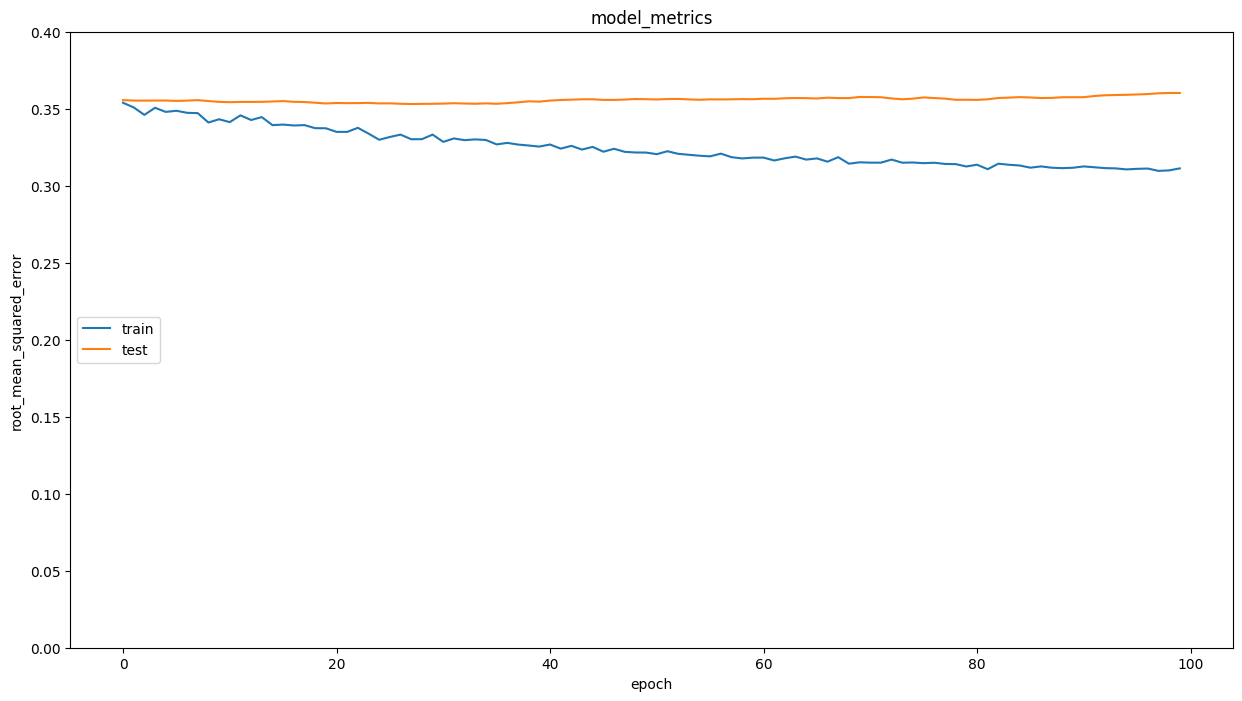

In [ ]:
# Menampilkan plot loss dan validation
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

**Insight:**
Melihat apakah model overfitting atau underfitting dari plot metrik.

# Prediksi Top 10 Rekomendasi Pariwisata di Bandung


In [ ]:
# Menyiapkan dataframe
place_df = df_place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = df_rating.copy()

In [ ]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [ ]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
# Prediksi rating untuk semua tempat yang belum dikunjungi user
ratings = model.predict(user_place_array).flatten()

# Ambil indeks 10 tempat dengan rating prediksi tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]

# Ambil ID tempat dari hasil prediksi terbaik
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[idx][0])
    for idx in top_ratings_indices
]

# Header rekomendasi
print(f"Daftar rekomendasi untuk: User {user_id}")
print("=" * 45, '\n')

# Menampilkan 5 tempat dengan rating tertinggi yang pernah dikunjungi user
print("Tempat dengan rating wisata paling tinggi dari user")
print("-" * 60)

top_place_user_ids = (
    place_visited_by_user
    .sort_values(by='Place_Ratings', ascending=False)
    .head(5)
    .Place_Id
    .values
)

top_place_user_df = place_df[place_df['id'].isin(top_place_user_ids)]

for row in top_place_user_df.itertuples():
    print(f"{row.place_name} : {row.category}")

print("\n" + "-" * 60)
print("Top 10 Rekomendasi Tempat Wisata untuk Anda")
print("-" * 60)

# Menampilkan daftar 10 tempat rekomendasi
recommended_places_df = place_df[place_df['id'].isin(recommended_place_ids)]

for i, row in enumerate(recommended_places_df.itertuples(), start=1):
    print(f"{i}. {row.place_name}")
    print(f"    Kategori       : {row.category}")
    print(f"    Harga Tiket    : {row.price}")
    print(f"    Rating Wisata  : {row.rating}\n")

print("=" * 45)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Daftar rekomendasi untuk: User 152

Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Kebun Binatang Bandung : Cagar Alam
Taman Lalu Lintas Ade Irma Suryani Nasution : Taman Hiburan
Museum Barli : Budaya
Monumen Perjuangan Rakyat Jawa Barat : Budaya
Taman Begonia : Cagar Alam

------------------------------------------------------------
Top 10 Rekomendasi Tempat Wisata untuk Anda
------------------------------------------------------------
1. Upside Down World Bandung
    Kategori       : Taman Hiburan
    Harga Tiket    : 100000
    Rating Wisata  : 4.0

2. Taman Lansia
    Kategori       : Taman Hiburan
    Harga Tiket    : 0
    Rating Wisata  : 4.4

3. Selasar Sunaryo Art Space
    Kategori       : Taman Hiburan
    Harga Tiket    : 25000
    Rating Wisata  : 4.6

4. Teras Cikapundung BBWS
    Kategori       : Taman Hiburan
    Harga Tiket    : 0
    Rating Wisata  : 4.3

5. Museum 

**Insight Akhir :**
- Jumlah tempat wisata di Bandung sangat bervariasi dalam kategori, dan bisa direkomendasikan baik berdasarkan konten (kategori) maupun rating user.

- Sistem ini dapat dikembangkan lebih lanjut menjadi aplikasi mobile atau web, dengan input dari lokasi dan minat user.

